In [49]:
import pandas as pd
import numpy as np
import seaborn as sns

### Udacity DSND Project 1: Exploring Airbnb Seattle Dataset

### Business Questions:
   1. What?
   2. What?
   3. What?

### 1. Exploring the listing dataset

In [126]:
seattle_listings_df = pd.read_csv("data/airbnb/seattle/listings.csv")
seattle_listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


#### Show all the columns of the dataset

In [127]:
seattle_listings_df.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       

#### Ccompute the null value proportion of each column

In [128]:
seattle_listings_df.isnull().mean().sort_values(ascending=False)

license                             1.000000
square_feet                         0.974594
monthly_price                       0.602672
security_deposit                    0.511262
weekly_price                        0.473808
notes                               0.420639
neighborhood_overview               0.270299
cleaning_fee                        0.269775
transit                             0.244631
host_about                          0.224987
host_acceptance_rate                0.202462
review_scores_accuracy              0.172342
review_scores_checkin               0.172342
review_scores_value                 0.171818
review_scores_location              0.171556
review_scores_cleanliness           0.171032
review_scores_communication         0.170508
review_scores_rating                0.169460
reviews_per_month                   0.164222
first_review                        0.164222
last_review                         0.164222
space                               0.149031
host_respo

In [130]:
seattle_listings_df['weekly_price']

0             NaN
1       $1,000.00
2             NaN
3         $650.00
4             NaN
5         $800.00
6         $575.00
7         $360.00
8         $500.00
9       $1,000.00
10        $595.00
11        $800.00
12      $1,575.00
13            NaN
14            NaN
15            NaN
16            NaN
17            NaN
18            NaN
19      $4,100.00
20        $750.00
21        $568.00
22      $3,000.00
23        $350.00
24            NaN
25            NaN
26            NaN
27        $360.00
28            NaN
29        $500.00
          ...    
3788      $850.00
3789      $500.00
3790          NaN
3791      $600.00
3792          NaN
3793      $725.00
3794    $1,000.00
3795          NaN
3796          NaN
3797          NaN
3798      $499.00
3799      $375.00
3800          NaN
3801      $700.00
3802    $1,300.00
3803          NaN
3804      $888.00
3805          NaN
3806          NaN
3807          NaN
3808          NaN
3809      $600.00
3810    $1,120.00
3811          NaN
3812      

In [141]:
import re

currency_symbol = re.compile('[$,]')

seattle_listings_df['price'] = seattle_listings_df['price'].apply(lambda x: currency_symbol.sub('', x)).astype('float64')
#seattle_listings_df['weekly_price'] = seattle_listings_df['weekly_price'].apply(lambda x: currency_symbol.sub('', x) if x!='NaN').astype('float64')
#seattle_listings_df['monthly_price'] = seattle_listings_df['monthly_price'].apply(lambda x: currency_symbol.sub('', x)).astype('float64')

SyntaxError: invalid syntax (<ipython-input-141-fa6481fe4601>, line 6)

### 2. Clean the dataset

In [142]:
seattle_listings_df.isnull()['neighbourhood'].mean()

0.10895756940806706

In [143]:
seattle_listings_df = seattle_listings_df.dropna(subset=['neighbourhood'], axis=0)

In [144]:
neighbourhood_list_count = seattle_listings_df.groupby(['neighbourhood']).size()
data = neighbourhood_list_count.sort_values(ascending=False)[:10]

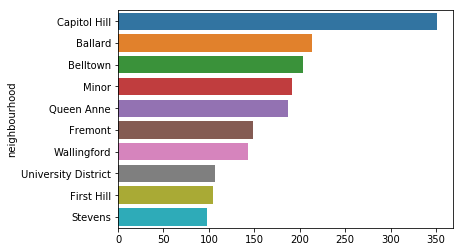

In [145]:
ax = sns.barplot(y=data.index, x=data.values)

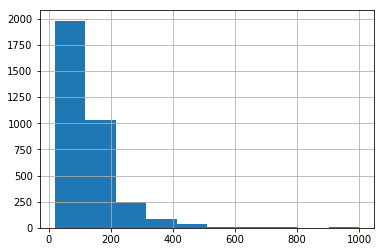

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

seattle_listings_df['price'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d906eb8>,
      dtype=object)

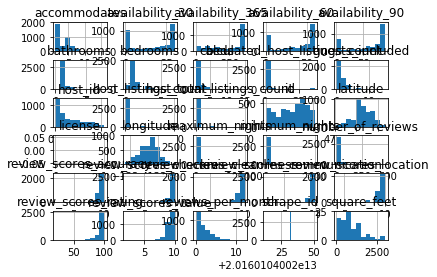

In [12]:
seattle_listings_df.hist()

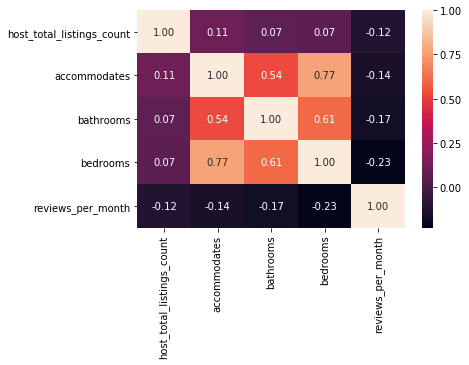

In [29]:
sns.heatmap(seattle_listings_df[['host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'reviews_per_month']].corr(), annot=True, fmt='.2f')